<a href="https://colab.research.google.com/github/RTX3080Ti/Segment-Any-Anomaly/blob/SAA-plus/Segment_Any_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone Project

In [2]:
!git clone https://github.com/RTX3080Ti/Segment-Any-Anomaly.git
%cd Segment-Any-Anomaly/
!ls

Cloning into 'Segment-Any-Anomaly'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 247 (delta 16), reused 15 (delta 15), pack-reused 221
Receiving objects: 100% (247/247), 35.09 MiB | 12.55 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Segment-Any-Anomaly/Segment-Any-Anomaly
app.py	  eval_SAA.py	 run_KSDD2.py	       run_VisA_public.py
assets	  GroundingDINO  run_MTD.py	       SAA
datasets  install.sh	 run_MVTec.py	       SAM
demo.py   README.md	 run_VAND_workshop.py  utils


## Installation

In [3]:
%cd GroundingDINO/
!pip install -e .
%cd ../SAM
!pip install -e .
!pip install opencv-python pycocotools matplotlib onnxruntime onnx ipykernel gradio loguru

/content/Segment-Any-Anomaly/Segment-Any-Anomaly/GroundingDINO
Obtaining file:///content/Segment-Any-Anomaly/Segment-Any-Anomaly/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.0 MB/s eta 0:00:00
  Running setup.py develop for groundingdino
/content/Segment-Any-Anomaly/Segment-Any-Anomaly/SAM
Obtaining file:///content/Segment-Any-Anomaly/Segment-Any-Anomaly/SAM
  Preparing metadata (setup.py) ... done
  Running setup.py develop for SAM
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━

## Download Weights

In [4]:
%cd ..
%mkdir weights
%cd ./weights
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
%cd ..

/content/Segment-Any-Anomaly/Segment-Any-Anomaly
/content/Segment-Any-Anomaly/Segment-Any-Anomaly/weights
--2023-09-08 01:06:33--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.27, 52.84.251.114, 52.84.251.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  48.6MB/s    in 17s     

2023-09-08 01:06:50 (141 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

--2023-09-08 01:06:50--  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 F

## 🏃 Run Segment-Any-Anomaly Demo

In [5]:
import sys
sys.path.append('./GroundingDINO')
sys.path.append('./SAM')
sys.path.append('.')
import matplotlib.pyplot as plt
import SAA as SegmentAnyAnomaly
from utils.training_utils import *
import os
%matplotlib inline

## Preparation

In [6]:
gpu_id = 0

os.environ['CURL_CA_BUNDLE'] = ''
os.environ['CUDA_VISIBLE_DEVICES'] = f"{gpu_id}"


dino_config_file = 'GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py'
dino_checkpoint = 'weights/groundingdino_swint_ogc.pth'
sam_checkpoint = 'weights/sam_vit_h_4b8939.pth'
box_threshold = 0.1
text_threshold = 0.1
eval_resolution = 1024
device = f"cuda:0"
root_dir = 'result'

# get the model
model = SegmentAnyAnomaly.Model(
    dino_config_file=dino_config_file,
    dino_checkpoint=dino_checkpoint,
    sam_checkpoint=sam_checkpoint,
    box_threshold=box_threshold,
    text_threshold=text_threshold,
    out_size=eval_resolution,
    device=device,
)

model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


build_sam_vit_h
wide_resnet50_2


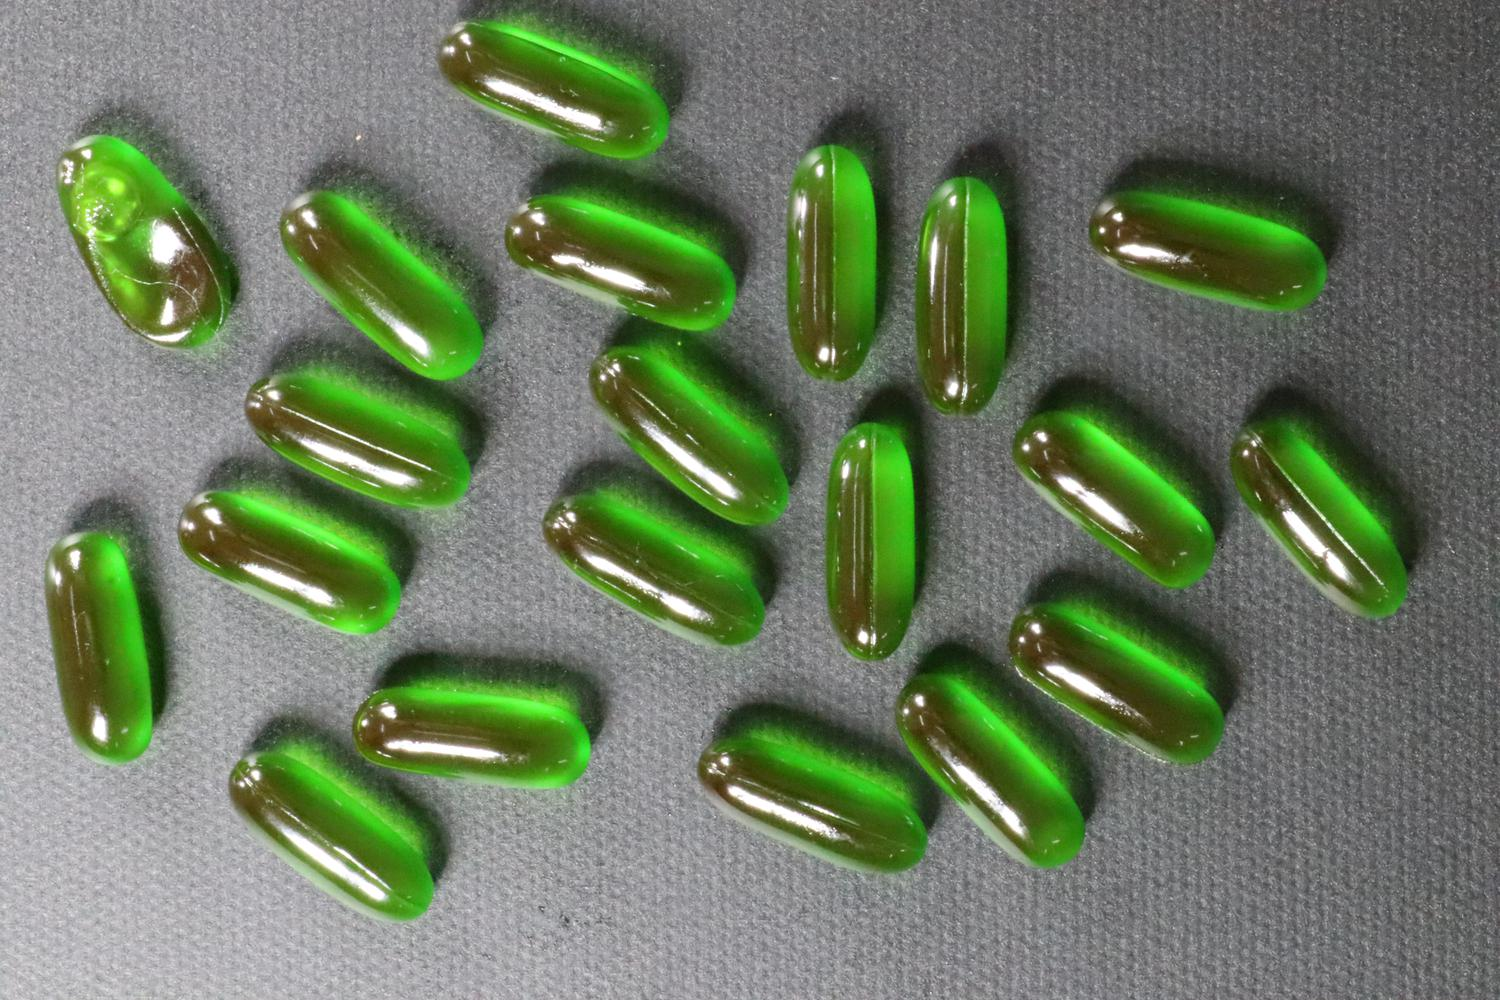

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# image_path = 'assets/candle.JPG'
# textual_prompts = ['color defect. hole. black defect. wick hole. spot. ', 'candle'] # detect prompts, filtered phrase
# property_text_prompts = 'the image of candle have 4 similar candle, with a maximum of 1 anomaly. The anomaly would not exceed 0.3 object area. '

# image_path = 'assets/carpet.png'
# textual_prompts = ['defect. ', 'carpet'] # detect prompts, filtered phrase
# property_text_prompts = 'the image of carpet have 1 dissimilar carpet, with a maximum of 5 anomaly. The anomaly would not exceed 0.9 object area. '

image_path = 'assets/lens0115.jpg'
# textual_prompts = [
#         ['black melt. dark liquid.', 'capsules'],
#         ['bubble', 'capsules'],  # 33+-->37+
#     ] # detect prompts, filtered phrase
# property_text_prompts = 'the image of capsule have 20 dissimilar capsule, with a maximum of 1 anomaly. The anomaly would not exceed 1. object area. '

textual_prompts = [
        ['black melt. dark liquid.', 'lens'],
        ['bubble', 'lens'],  # 33+-->37+
    ] # detect prompts, filtered phrase
property_text_prompts = 'the image of lens have 2 dissimilar lens, with a minimum of 1 anomaly. The anomaly would not exceed 0.5. object area. '


image = cv2.imread(image_path)
cv2_imshow(image)

## Inference

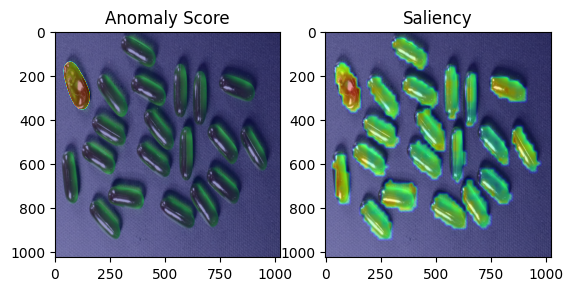

In [ ]:
model.set_ensemble_text_prompts(textual_prompts, verbose=False)
model.set_property_text_prompts(property_text_prompts, verbose=False)


score, appendix = model(image)

similarity_map = appendix['similarity_map']

image_show = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_show = cv2.resize(image_show, (eval_resolution, eval_resolution))
similarity_map = cv2.resize(similarity_map, (eval_resolution, eval_resolution))
score = cv2.resize(score, (eval_resolution, eval_resolution))

plt.subplot(121)
plt.imshow(image_show)
plt.imshow(score, alpha=0.4,cmap='jet')
plt.title('Anomaly Score')

plt.subplot(122)
plt.imshow(image_show)
plt.imshow(similarity_map, alpha=0.4, cmap='jet')
plt.title('Saliency')
plt.show()